In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv('full_data_with_dates.csv')

In [3]:
small_data = data[['Date','Month']]

In [4]:
winter = small_data[(small_data['Month']==12)|(small_data['Month']==1)|(small_data['Month']==2)]

In [5]:
summer = small_data[(small_data['Month']==6)|(small_data['Month']==7)|(small_data['Month']==8)]

In [6]:
winter_dist = list(winter.groupby(['Date']).count().Month)
summer_dist = list(summer.groupby(['Date']).count().Month)

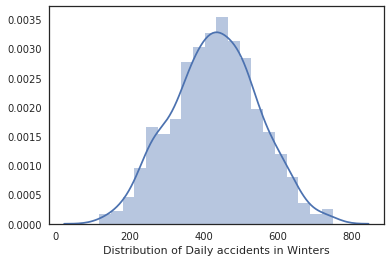

In [10]:
sns.distplot(winter_dist, axlabel='Distribution of Daily accidents in Winters')

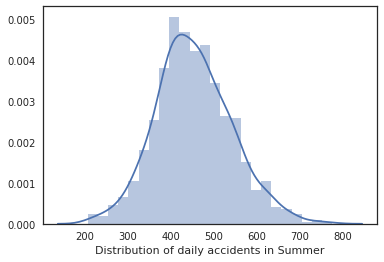

In [11]:
sns.distplot(summer_dist, axlabel='Distribution of daily accidents in Summer')

In [9]:
data.shape

(1640597, 73)

In [20]:
z_score = 1.645
mean_summer = np.mean(summer_dist)
mean_winter = np.mean(winter_dist)
summer_var = np.var(summer_dist)
winter_var = np.var(winter_dist)
ci_max = (mean_summer - mean_winter) + (z_score*np.sqrt(summer_var/len(summer_dist)+winter_var/len(winter_dist)))
ci_min = (mean_summer - mean_winter) - (z_score*np.sqrt(summer_var/len(summer_dist)+winter_var/len(winter_dist)))


In [21]:
ci_max

30.744067504318473

In [22]:
ci_min

14.80976937990017

In [23]:
stats.ks_2samp(summer_dist, winter_dist)

Ks_2sampResult(statistic=0.14852983707702688, pvalue=2.9574038093120065e-09)

In [24]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()
pooled = np.hstack([summer_dist, winter_dist])
delta = mean_summer - mean_winter
numSamples = 10000
estimates = list(map(lambda x: run_permutation_test(pooled,len(summer_dist),len(winter_dist),delta),range(numSamples)))
diffCount = len(np.where(estimates <= delta)[0])
hat_asl_perm = 1.0 - (float(diffCount)/float(numSamples))
hat_asl_perm

0.0